**Test Code for PCA**

In [1]:
import numpy as np
import pandas as pd
import sklearn

from sklearn import decomposition 
import matplotlib.pyplot as plt
import seaborn as sns
#from pyrolite.util.classification import TAS
#from pyrolite.util.synthetic import normal_frame, random_cov_matrix
#import pyrolite.plot
#from pyrolite.plot import pyroplot
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
#Importing PCA
from sklearn.decomposition import PCA
"""
Preprocessing the data
"""
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler 



In [3]:
#Getting tektite geochem data:
geochem_data = pd.read_csv('../data/geochem_data.csv', header=0)
geochem_data['sample_no'] = [i[1] for i in geochem_data['Sample'].str.split('_')]
geochem_data.tail()

,Sample,Point No.,Line,K2O,CaO,TiO2,SiO2,Al2O3,Na2O,MgO,FeO,MnO,Cl,SO3,P2O5,Total,sample_no
460,D3_sph33,2,NaN,1.43,9.37,0.68,59.32,15.00,2.79,3.20,5.52,0.17,1.05,0.05,NaN,98.55,sph33
461,D3_sph33,3,NaN,1.44,9.78,0.61,58.10,14.14,2.94,3.04,5.99,0.16,1.62,0.10,NaN,97.89,sph33
462,D3_sph33,4,NaN,1.71,7.03,0.58,63.86,15.41,3.11,2.42,4.55,0.11,0.74,0.11,NaN,99.61,sph33
463,D3_sph33,5,NaN,1.64,7.28,0.65,63.05,15.17,3.02,2.46,4.77,0.12,1.14,0.11,NaN,99.37,sph33
464,D3_sph33,6,NaN,1.50,7.48,0.61,62.64,15.15,2.96,2.52,4.94,0.12,1.35,0.10,NaN,99.34,sph33


In [5]:
#Getting features/variables of the dataframe:
features = ['K2O', 'CaO', 'TiO2', 
            'SiO2','Al2O3', 'Na2O',
            'MgO', 'FeO', 'MnO', 
            'Cl', 'SO3']

x = geochem_data[features].values


In [7]:
"""
Preprocess
Necessary for machine learning
"""
scaler = StandardScaler()
scaler.fit(x)

scaled_data = scaler.transform(x)
scaled_data;

In [8]:
#Define PCA model to use:
pca = PCA(n_components=5)

#fit PCA model to data
pca_fit = pca.fit(scaled_data)

In [9]:
x_pca = pca.transform(scaled_data); 


Text(0, 0.5, 'PC$_{2}$')

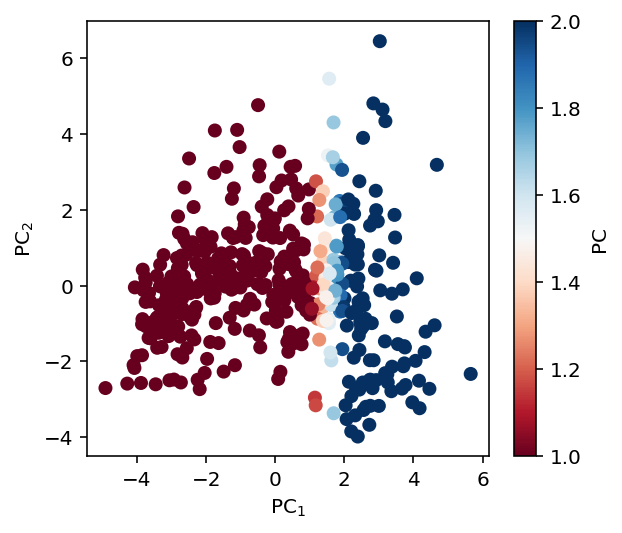

In [12]:
"""
Look at two PCs
"""
fig= plt.figure(figsize = (4.5,4))
plt.scatter(x_pca[:,0], x_pca[:,1],
            c = x_pca[:,0],
            cmap = 'RdBu', 
            vmin =1, vmax = 2)
plt.colorbar(label = 'PC')
plt.xlabel('PC$_{1}$')
plt.ylabel('PC$_{2}$')

**Making Scree Plot of PCA**

The variance percentages are: [45.89789039 24.04448609  9.71627672  7.68836326  4.41887113]


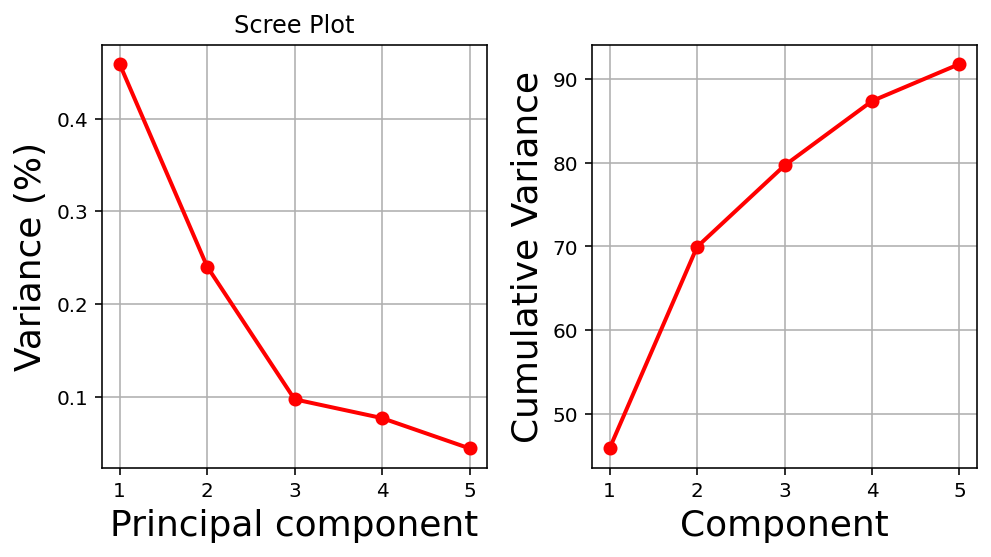

In [48]:
#Getting variance of PCA plots:
PC_vals = np.arange(pca.n_components) + 1
variance = pca.explained_variance_ratio_

fig, ax = plt.subplots(1, 2, figsize = (7,4))
ax[0].plot(PC_vals,variance,'o-',linewidth=2,color='red')
ax[0].set_title('Scree Plot',)
ax[0].set_xlabel('Principal component', fontsize='18')
ax[0].set_ylabel('Variance (%)',fontsize='18')
ax[0].grid()

ax[1].plot(PC_vals, np.cumsum(variance)*100, 'o-',
          lw = 2, color = 'red')
ax[1].set_xlabel('Component',fontsize='18')
ax[1].set_ylabel('Cumulative Variance',fontsize='18')
ax[1].grid()
plt.tight_layout()
plt.savefig('Scree_plots.png')
print('The variance percentages are:', variance * 100)

In [15]:
np.cumsum(variance)*100

array([45.89789039, 69.94237648, 79.6586532 , 87.34701646, 91.76588759])

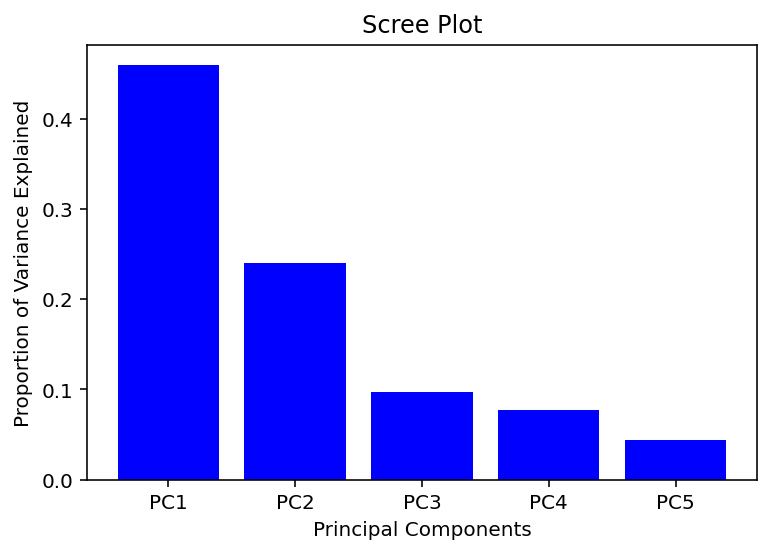

The variance percentages are: [45.89789039 24.04448609  9.71627672  7.68836326  4.41887113]


In [16]:
"""
Diagnostics
"""
PCs = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']; 
exp_var = pca.explained_variance_ratio_.tolist()

plt.bar(PCs, exp_var, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Proportion of Variance Explained')
plt.show()
print('The variance percentages are:', variance * 100)

In [17]:
"""
 Component weights

"""
pca_c1 = pca.components_[0]
for x, y in zip(pca_c1, geochem_data.iloc[:,3:].columns):
    print(x, y)

-0.41165308570955833 K2O
0.4310571490865188 CaO
-0.260084925620041 TiO2
-0.41988620442354724 SiO2
-0.37426779838386076 Al2O3
-0.34997795388965675 Na2O
0.3006384630506233 MgO
-0.1172535274157551 FeO
-0.10502293023701537 MnO
0.07995004951052624 Cl
0.1291054742531528 SO3


In [18]:
pca_c2 = pca.components_[1]
for x, y in zip(pca_c2, geochem_data.iloc[:,3:].columns):
    print(x, y)

-0.163629500145546 K2O
-0.07826665176827072 CaO
0.3679964328527239 TiO2
-0.04884542894134322 SiO2
0.18101025116717784 Al2O3
-0.2573228339529894 Na2O
0.381875363806619 MgO
0.5391783163459454 FeO
0.5100737681773563 MnO
-0.026947792276582894 Cl
0.18129873879812777 SO3


In [19]:
pca_c3 = pca.components_[2]
for x, y in zip(pca_c3, geochem_data.iloc[:,3:].columns):
    print(x, y)

0.04882991190002728 K2O
0.048285796974682035 CaO
0.1829058276488603 TiO2
-0.13161987171971165 SiO2
0.0020744900253411554 Al2O3
0.018078837269701734 Na2O
-0.029212356561899522 MgO
0.06650830472589961 FeO
0.02846799750942999 MnO
0.8804006039821746 Cl
-0.4037106321132145 SO3


In [20]:
pca_c4 = pca.components_[3]
for x, y in zip(pca_c4, geochem_data.iloc[:,3:].columns):
    print(x, y)

0.09958878184264636 K2O
0.007970941827603908 CaO
0.16683694694310175 TiO2
-0.046160754741781725 SiO2
0.09923954184554445 Al2O3
0.061247298394317085 Na2O
-0.16385770952026826 MgO
-0.11222394893641674 FeO
-0.14514564073424152 MnO
0.35790990217747687 Cl
0.8705418539407398 SO3


In [21]:
pca_c5 = pca.components_[4]
for x, y in zip(pca_c5, geochem_data.iloc[:,3:].columns):
    print(x, y)

0.11424496878899759 K2O
-0.137545476919001 CaO
-0.5803298834188737 TiO2
0.17268973633929724 SiO2
-0.4603537842419429 Al2O3
0.24450966933788792 Na2O
-0.05520589700557665 MgO
0.2819394660040085 FeO
0.4312706248495007 MnO
0.18292492873394248 Cl
0.16649561624503068 SO3


**PCA Plots**

In [22]:
#x_pca = pca.transform(x.reshape(1,-1))

#Getting Principal Components:
PC1 = x_pca[:,0]
PC2 = x_pca[:,1]
PC3 = x_pca[:,2]
PC3 = x_pca[:,3]
PC3 = x_pca[:,4]

pca_fractions = pca.components_.T*3


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


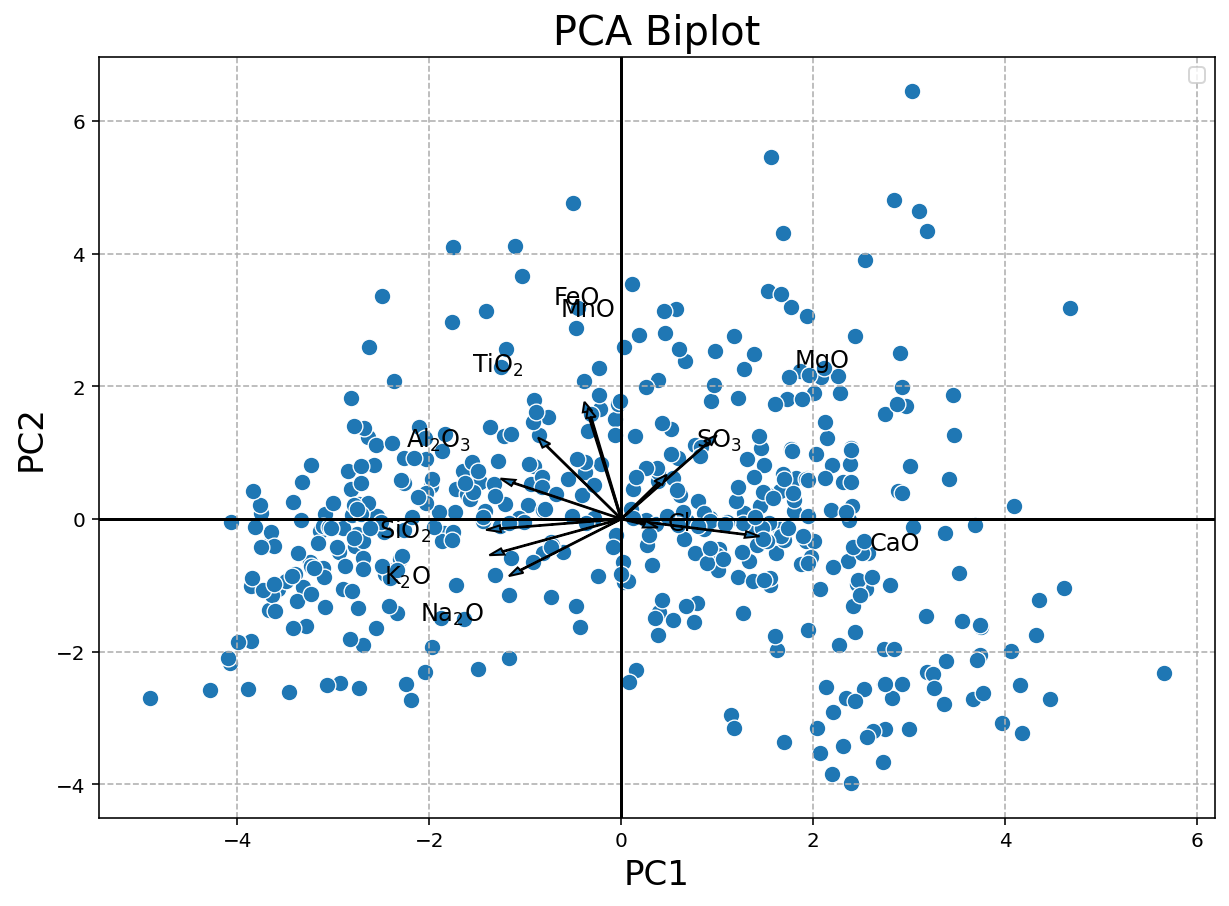

In [49]:
#first and second components:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], s=70, aplha = 0.5), #hue=geochem_data.sample_no, palette='Spectral')
for i in range(len(pca_fractions)):
    plt.arrow(0,0, pca_fractions[i][0], pca_fractions[i][1], width=0.01, head_width=0.1)
    plt.annotate(features[i], color = 'red', xy=(pca_fractions[i][0]*2, 
                                      pca_fractions[i][1]*2), fontsize=13)
plt.axhline(0, -1, 1, color = 'k')
plt.axvline(0, -1, 1, color = 'k')
plt.grid(linestyle='--')
# plt.gca().invert_yaxis()
plt.title('PCA Biplot',fontsize='20')
plt.xlabel('PC1',fontsize='17')
plt.ylabel('PC2',fontsize='17')
plt.legend(bbox_to_anchor = (1,1), ncol = 2)
#plt.savefig('PC12_biplot.png')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


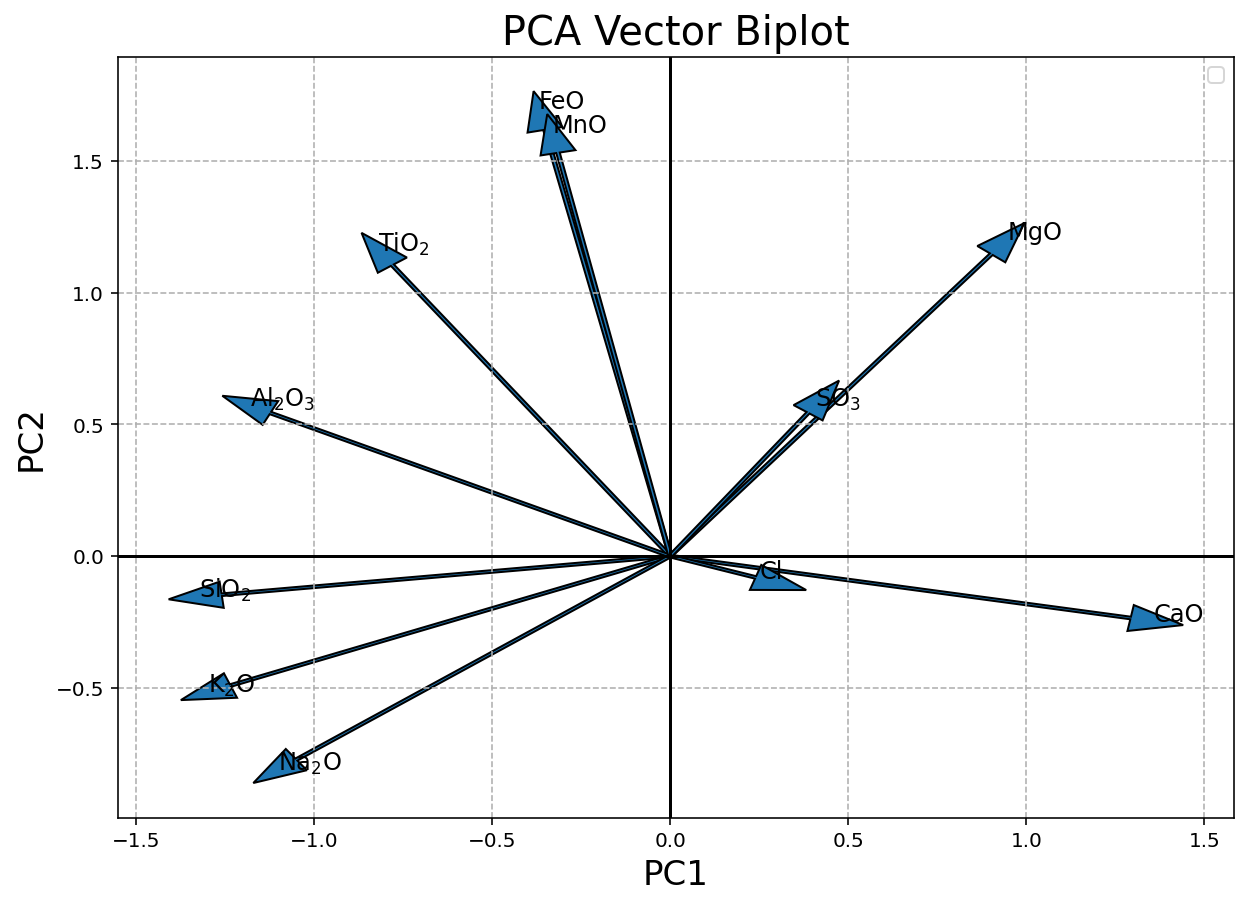

In [50]:
#Vector biplot for the first and sceond components:
#first and second components:
plt.figure(figsize=(10, 7))
#sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], s=70), #hue=geochem_data.sample_no, palette='Spectral')
for i in range(len(pca_fractions)):
    plt.arrow(0,0, pca_fractions[i][0], pca_fractions[i][1], width=0.01, head_width=0.1)
    plt.annotate(features[i], xy=(pca_fractions[i][0]*1.05, 
                                      pca_fractions[i][1]*1.05), fontsize=12 )
plt.axhline(0, -1, 1, color = 'k')
plt.axvline(0, -1, 1, color = 'k')
plt.grid(linestyle='--')
# plt.gca().invert_yaxis()
plt.title('PCA Vector Biplot',fontsize='20')
plt.xlabel('PC1',fontsize='17')
plt.ylabel('PC2',fontsize='17')
#plt.savefig('PC12_vbiplot.png')
plt.legend(bbox_to_anchor = (1,1), ncol = 2)
plt.show()

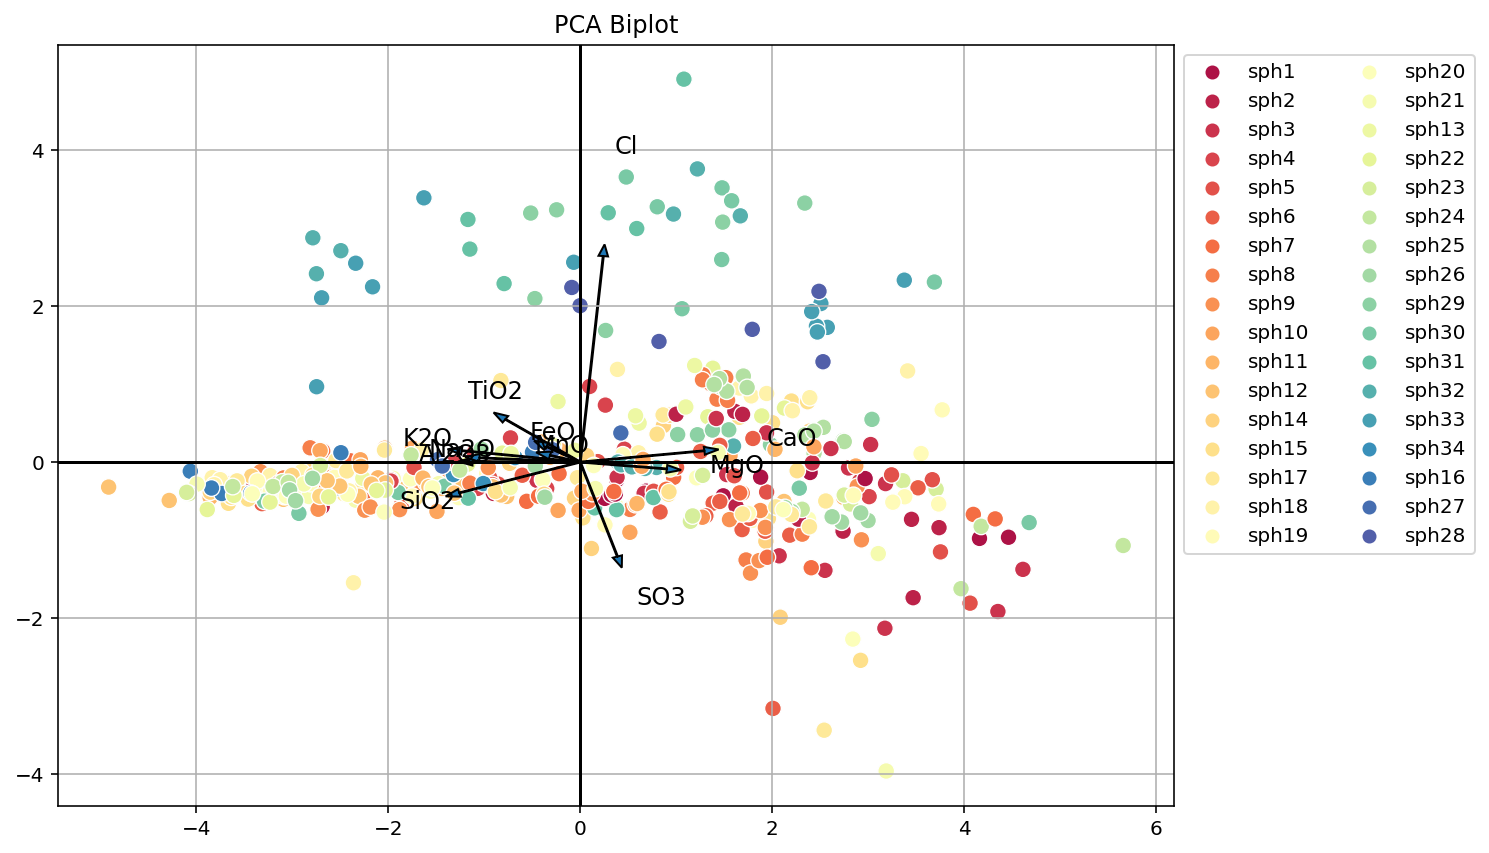

In [25]:
#First and third components:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 2], s=70, hue=geochem_data.sample_no, palette='Spectral')
for i in range(len(pca_fractions)):
    plt.arrow(0,0, pca_fractions[i][0], pca_fractions[i][2], width=0.01, head_width=0.1)
    plt.annotate(features[i], xy=(pca_fractions[i][0]*1.5, 
                                      pca_fractions[i][2]*1.5), fontsize=12 )
plt.axhline(0, -1, 1, color = 'k')
plt.axvline(0, -1, 1, color = 'k')
plt.grid()
# plt.gca().invert_yaxis()
plt.title('PCA Biplot')
plt.legend(bbox_to_anchor = (1,1), ncol = 2)

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


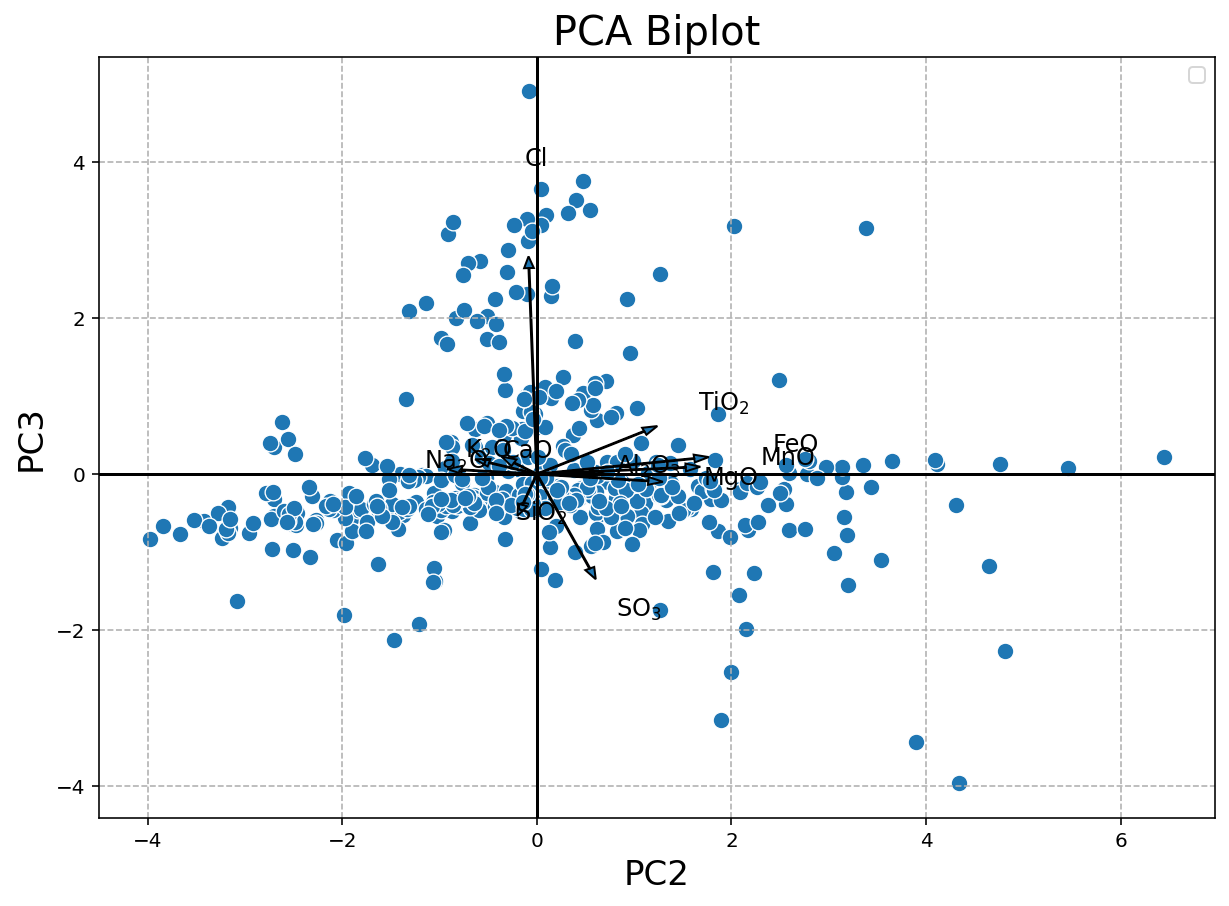

In [51]:
#Second and third components 
plt.figure(figsize=(10, 7))
sns.scatterplot(x=x_pca[:, 1], y=x_pca[:, 2], alpha=0.4, s=70), #hue=geochem_data.sample_no, palette='Spectral')
for i in range(len(pca_fractions)):
    plt.arrow(0,0, pca_fractions[i][1], pca_fractions[i][2], width=0.01, head_width=0.1)
    plt.annotate(features[i], color = 'red', xy=(pca_fractions[i][1]*1.5, 
                                      pca_fractions[i][2]*1.5), fontsize=12 )
plt.axhline(0, -1, 1, color = 'k')
plt.axvline(0, -1, 1, color = 'k')
plt.grid(linestyle='--')
# plt.gca().invert_yaxis()
plt.title('PCA Biplot',fontsize='20')
plt.xlabel('PC2',fontsize='17')
plt.ylabel('PC3',fontsize='17')
plt.legend(bbox_to_anchor = (1,1), ncol = 2)
#plt.savefig('PC23_biplot.png')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


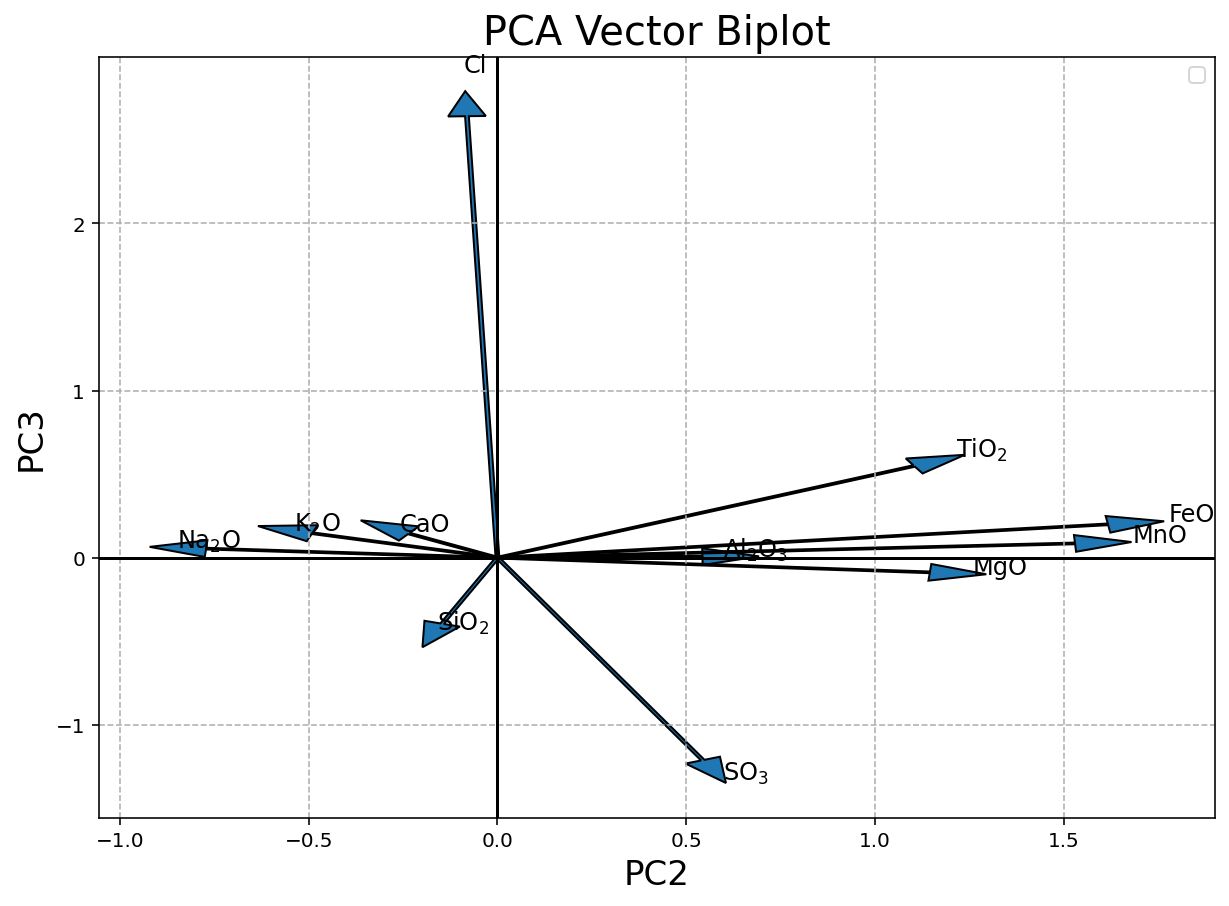

In [52]:
#Vector biplot for the second and third components:
#second and third components:
plt.figure(figsize=(10, 7))
#sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], s=70), #hue=geochem_data.sample_no, palette='Spectral')
for i in range(len(pca_fractions)):
    plt.arrow(0,0, pca_fractions[i][1], pca_fractions[i][2], width=0.01, head_width=0.1)
    plt.annotate(features[i], xy=(pca_fractions[i][1]*1.1, 
                                      pca_fractions[i][2]*1.1), fontsize=12 )
plt.axhline(0, -1, 1, color = 'k')
plt.axvline(0, -1, 1, color = 'k')
plt.grid(linestyle='--')
# plt.gca().invert_yaxis()
plt.title('PCA Vector Biplot',fontsize='20')
plt.xlabel('PC2',fontsize='17')
plt.ylabel('PC3',fontsize='17')
plt.legend(bbox_to_anchor = (1,1), ncol = 2)
#plt.savefig('PC23_vbiplot.png')
plt.show()

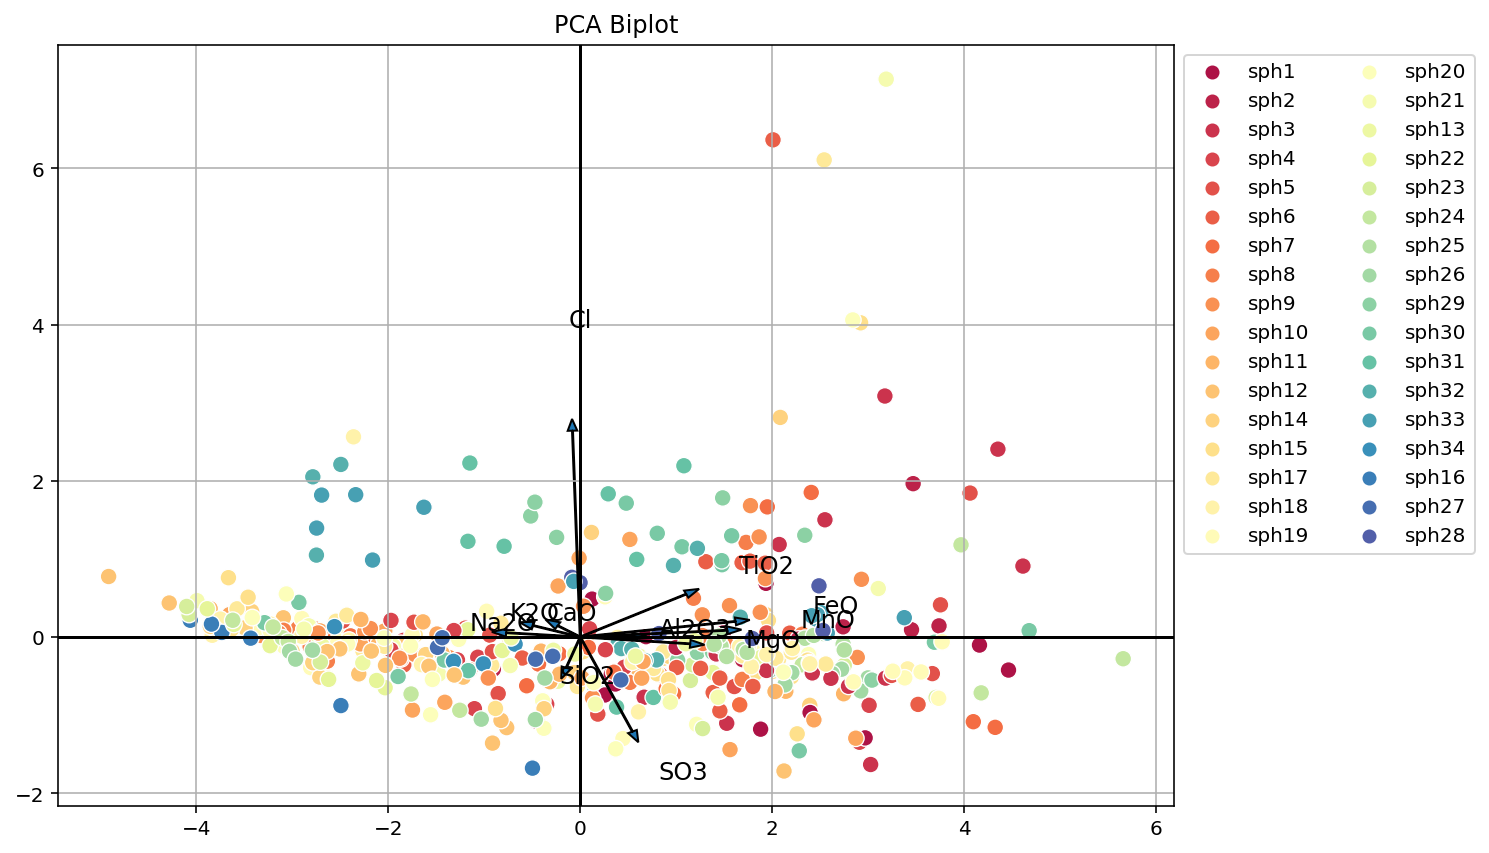

In [28]:
#First and Fourth components 
plt.figure(figsize=(10, 7))
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 3], s=70, hue=geochem_data.sample_no, palette='Spectral')
for i in range(len(pca_fractions)):
    plt.arrow(0,0, pca_fractions[i][1], pca_fractions[i][2], width=0.01, head_width=0.1)
    plt.annotate(features[i], xy=(pca_fractions[i][1]*1.5, 
                                      pca_fractions[i][2]*1.5), fontsize=12 )
plt.axhline(0, -1, 1, color = 'k')
plt.axvline(0, -1, 1, color = 'k')
plt.grid()
# plt.gca().invert_yaxis()
plt.title('PCA Biplot')
plt.legend(bbox_to_anchor = (1,1), ncol = 2)
plt.show()

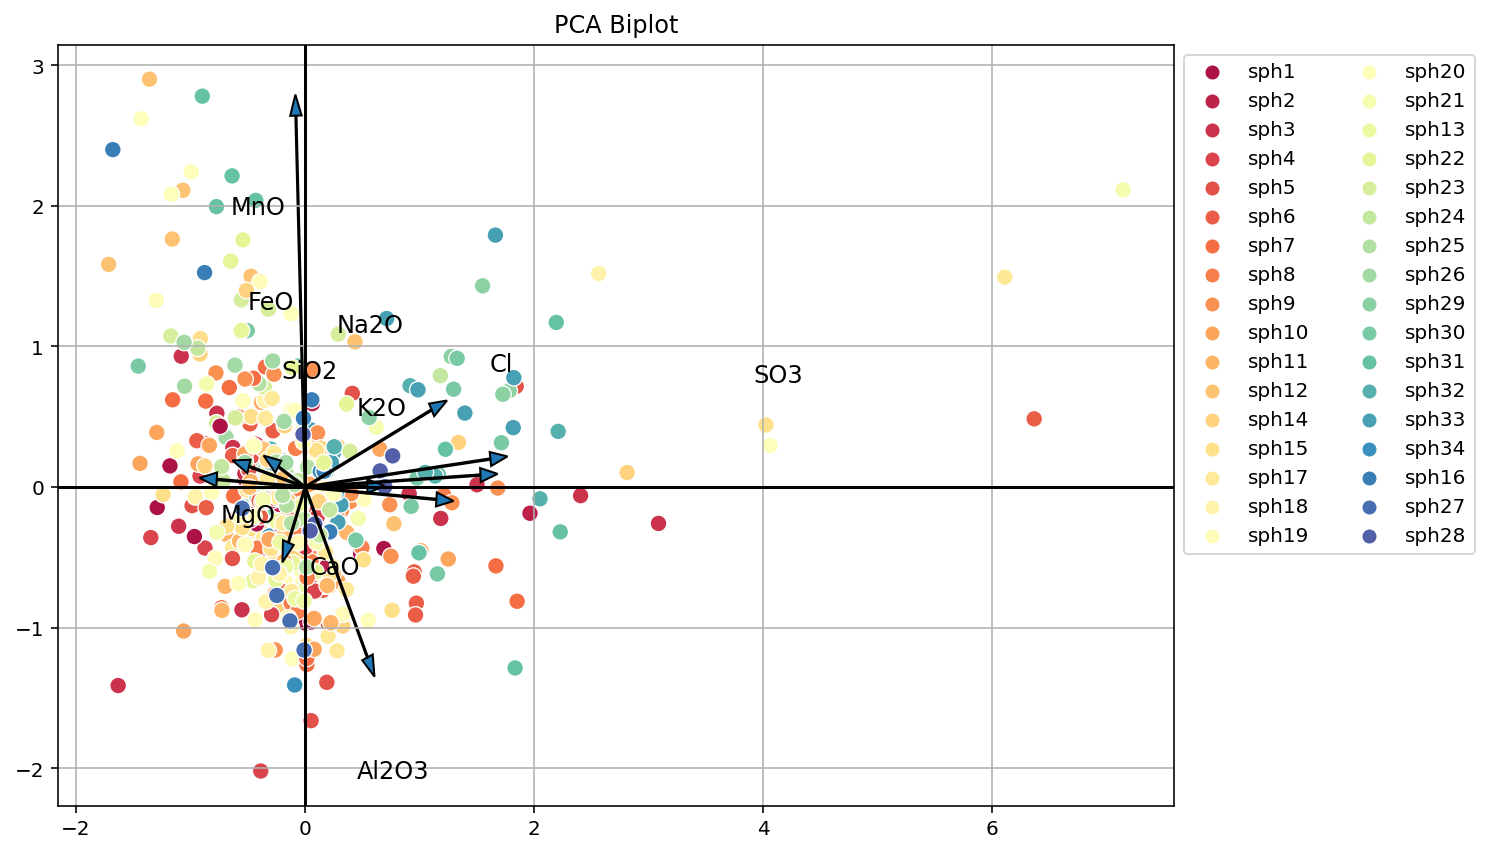

In [29]:
#Fourth and fifth components 
plt.figure(figsize=(10, 7))
sns.scatterplot(x=x_pca[:, 3], y=x_pca[:, 4], s=70, hue=geochem_data.sample_no, palette='Spectral')
for i in range(len(pca_fractions)):
    plt.arrow(0,0, pca_fractions[i][1], pca_fractions[i][2], width=0.01, head_width=0.1)
    plt.annotate(features[i], xy=(pca_fractions[i][3]*1.5, 
                                      pca_fractions[i][4]*1.5), fontsize=12 )
plt.axhline(0, -1, 1, color = 'k')
plt.axvline(0, -1, 1, color = 'k')
plt.grid()
# plt.gca().invert_yaxis()
plt.title('PCA Biplot')
plt.legend(bbox_to_anchor = (1,1), ncol = 2)
plt.show()

# PCA outputs

### PCA outputs

* Every Principle component output is a vector which has both direction and magnitude. 
* The sign of the outputs like above tells you the direction that a given variable or component is going on a single dimension vector
* Relative magnitudes of the vector are therefore proportional to the relative fractional weight of each component in the data
* All data is compositional so need to sort accordingly 

Text(0, 0.5, 'Weight')

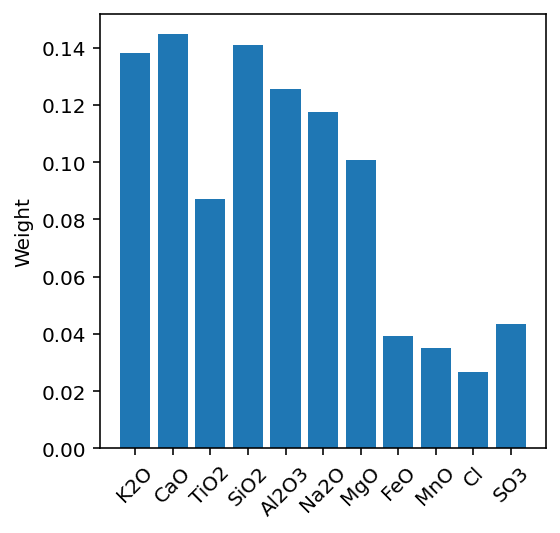

In [31]:
"""
PCA Data 
Results are vectors so 
are both magnitude and direction
can get a fractional mass by 
dividing by the sum of the abs value by the 
absolute value of each component within the 
mixture
"""
weights_pc1 = abs(pca_c1)/np.sum(abs(pca_c1))
"""
Bar Plots
"""
fig, ax = plt.subplots(1,1, figsize = (4,4))
plt.bar(np.arange(len(weights_pc1)), weights_pc1)
plt.xticks(np.arange(len(weights_pc1))); 
ax.set_xticklabels(features);
plt.xticks(rotation = 45); 
plt.ylabel('Weight')

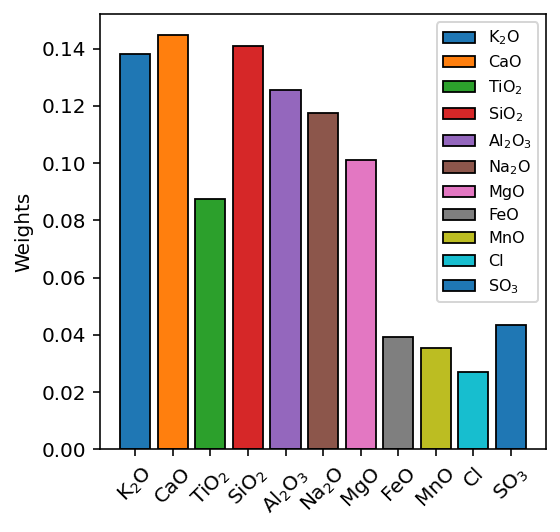

In [32]:
"""
Color code the features
"""
features = ['K$_{2}$O', 'CaO', 'TiO$_{2}$', 
            'SiO$_{2}$','Al$_{2}$O$_{3}$',
            'Na$_{2}$O', 'MgO', 'FeO',
            'MnO', 'Cl', 'SO$_{3}$']

weights_pc1 = abs(pca_c1)/np.sum(abs(pca_c1))


fig, ax = plt.subplots(1,1,figsize = (4,4))
for i in range(0,len(weights_pc1)):
    plt.bar(i, weights_pc1[i], 
           label =features[i], edgecolor= 'k', 
           lw = 0.9)
plt.xticks(np.arange(len(weights_pc1))); 
ax.set_xticklabels(features);
plt.xticks(rotation = 45);  
#plt.xticks([]);  Switch off the xticks
plt.ylabel('Weights')
plt.legend(fontsize = 8)

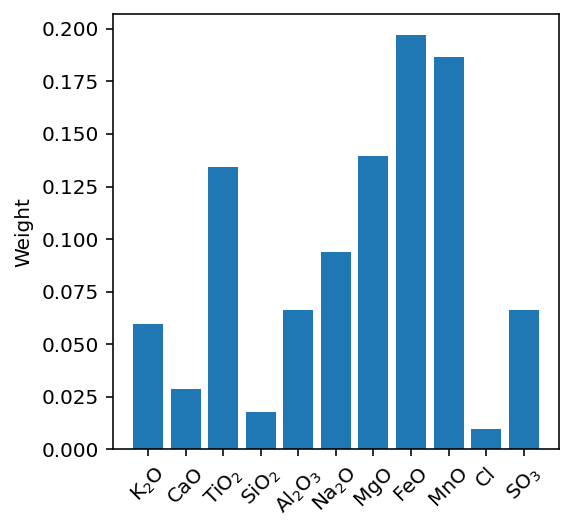

In [33]:
weights_pc2 = abs(pca_c2)/np.sum(abs(pca_c2))
"""
Bar Plots
"""
fig, ax = plt.subplots(1,1, figsize = (4,4))
plt.bar(np.arange(len(weights_pc2)), weights_pc2)
plt.xticks(np.arange(len(weights_pc2))); 
ax.set_xticklabels(features);
plt.xticks(rotation = 45); 
plt.ylabel('Weight')
plt.show()

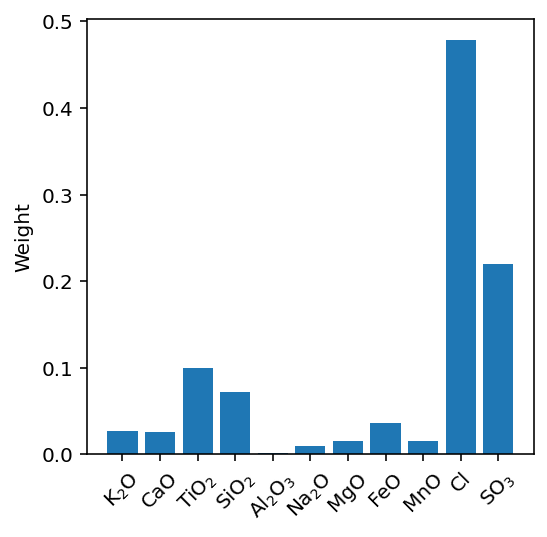

In [34]:
weights_pc3 = abs(pca_c3)/np.sum(abs(pca_c3))
"""
Bar Plots
"""
fig, ax = plt.subplots(1,1, figsize = (4,4))
plt.bar(np.arange(len(weights_pc3)), weights_pc3)
plt.xticks(np.arange(len(weights_pc3))); 
ax.set_xticklabels(features);
plt.xticks(rotation = 45); 
plt.ylabel('Weight')
plt.show()

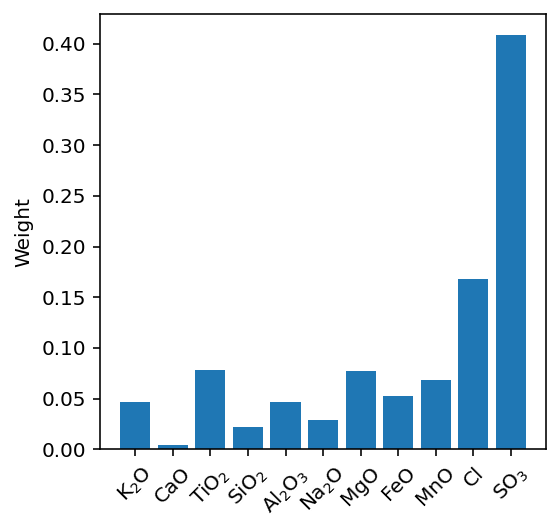

In [35]:
weights_pc4 = abs(pca_c4)/np.sum(abs(pca_c4))
"""
Bar Plots
"""
fig, ax = plt.subplots(1,1, figsize = (4,4))
plt.bar(np.arange(len(weights_pc4)), weights_pc4)
plt.xticks(np.arange(len(weights_pc4))); 
ax.set_xticklabels(features);
plt.xticks(rotation = 45); 
plt.ylabel('Weight')
plt.show()

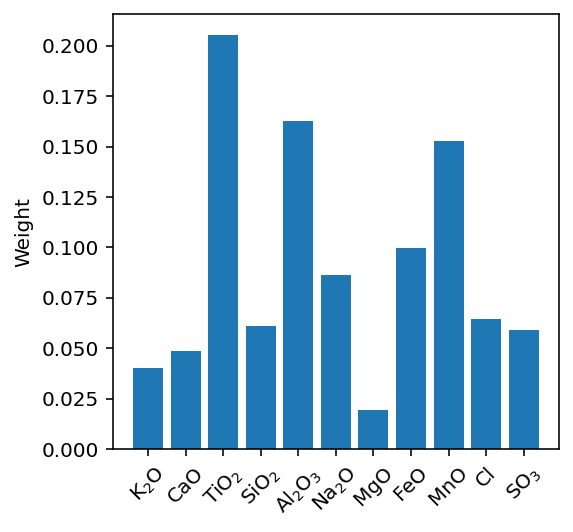

In [36]:
weights_pc5 = abs(pca_c5)/np.sum(abs(pca_c5))
"""
Bar Plots
"""
fig, ax = plt.subplots(1,1, figsize = (4,4))
plt.bar(np.arange(len(weights_pc5)), weights_pc5)
plt.xticks(np.arange(len(weights_pc5))); 
ax.set_xticklabels(features);
plt.xticks(rotation = 45); 
plt.ylabel('Weight')
plt.show()

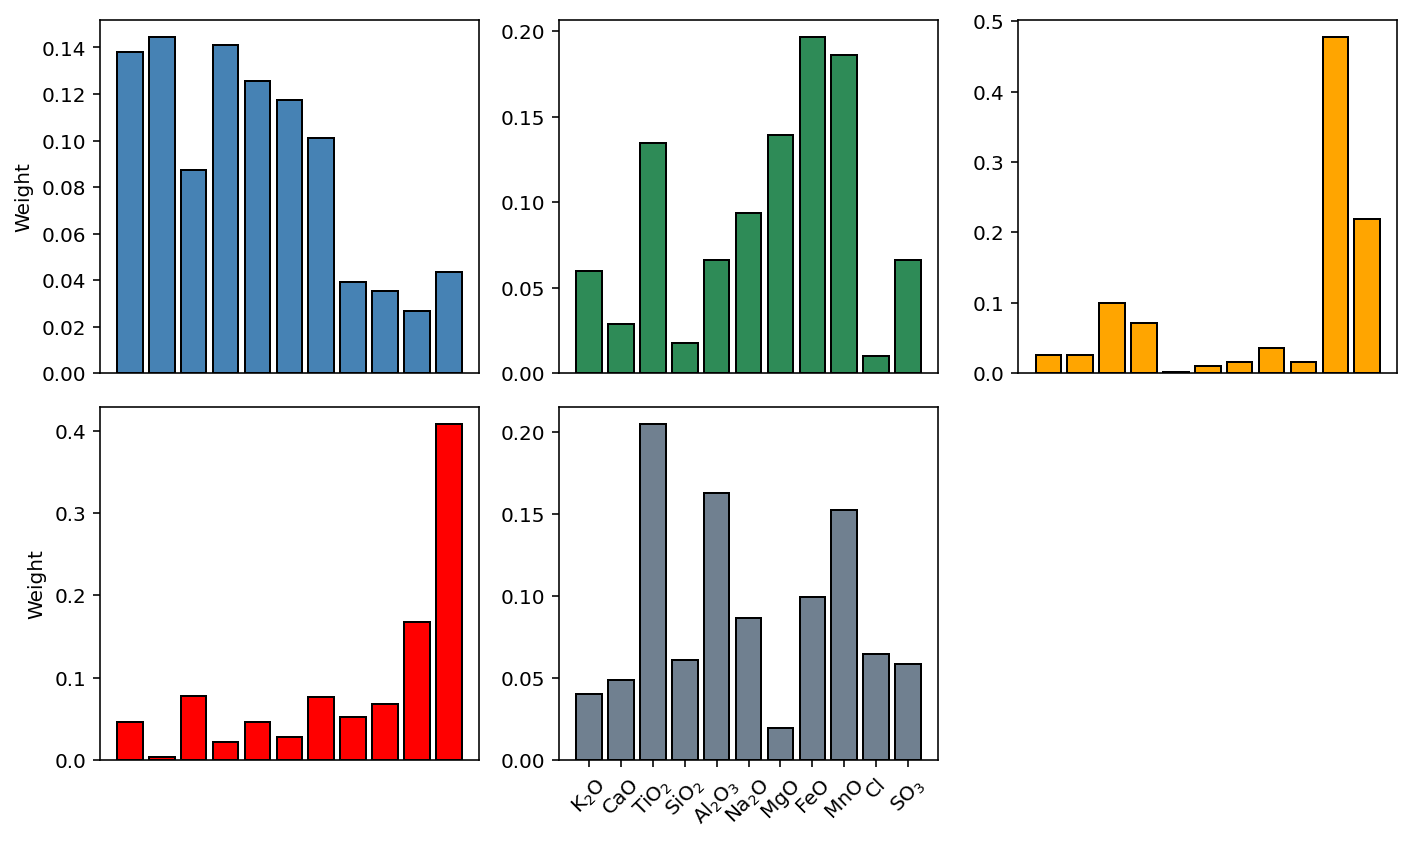

In [37]:
"""
Full Figure out
"""

fig, ax = plt.subplots(2, 3, figsize= (10,6))

ax[1,2].remove()

ax[0,0].bar(np.arange(len(weights_pc1)), weights_pc1, 
           edgecolor = 'k', color= 'steelblue')
ax[0,0].set_xticks([]);

ax[0,1].bar(np.arange(len(weights_pc2)), weights_pc2, 
           edgecolor = 'k', color= 'seagreen')
ax[0,1].set_xticks([]); 

ax[0,2].bar(np.arange(len(weights_pc3)), weights_pc3, 
           edgecolor = 'k', color= 'orange')
ax[0,2].set_xticks([]); 

ax[1,0].bar(np.arange(len(weights_pc4)), weights_pc4, 
           edgecolor = 'k', color= 'red')
ax[1,0].set_xticks([]); 

ax[1,1].bar(np.arange(len(weights_pc5)), weights_pc5, 
           edgecolor = 'k', color= 'slategrey')
ax[1,1].set_xticklabels(ax[1,1].get_xticks(), rotation = 45)
ax[1,1].set_xticks(np.arange(len(weights_pc4))); 
ax[1,1].set_xticklabels(features);


ax[0,0].set_ylabel('Weight')
ax[1,0].set_ylabel('Weight')

plt.tight_layout()



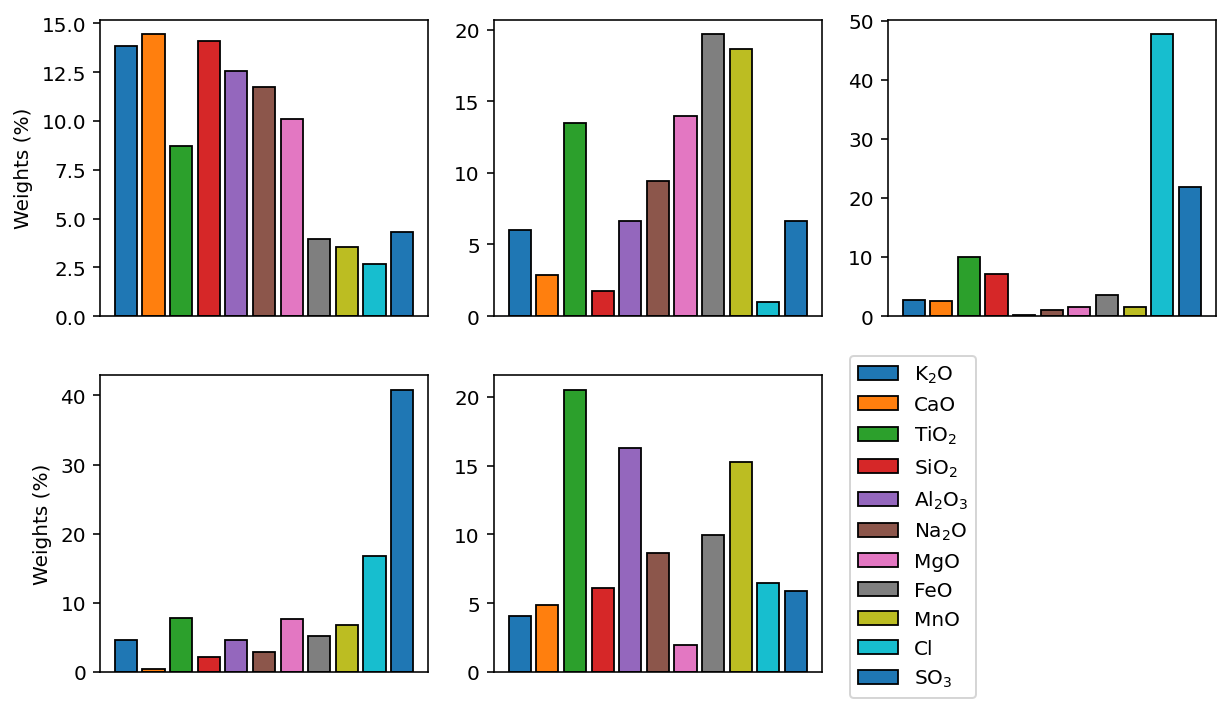

In [38]:
"""
Color code the features
"""
features = ['K$_{2}$O', 'CaO', 'TiO$_{2}$', 
            'SiO$_{2}$','Al$_{2}$O$_{3}$',
            'Na$_{2}$O', 'MgO', 'FeO',
            'MnO', 'Cl', 'SO$_{3}$']

weights_pc1 = abs(pca_c1)/np.sum(abs(pca_c1))*100
weights_pc2 = abs(pca_c2)/np.sum(abs(pca_c2))*100
weights_pc3 = abs(pca_c3)/np.sum(abs(pca_c3))*100
weights_pc4 = abs(pca_c4)/np.sum(abs(pca_c4))*100
weights_pc5 = abs(pca_c5)/np.sum(abs(pca_c5))*100



fig, ax = plt.subplots(2,3,figsize = (10,6))
ax[1,2].remove()
for i in range(0,len(weights_pc1)):
    ax[0,0].bar(i, weights_pc1[i], 
           label =features[i], edgecolor= 'k', 
           lw = 0.9)
ax[0,0].set_xticks([]);  
ax[0,0].set_ylabel('Weights (%)')
ax[0,0].legend(fontsize = 10,
               bbox_to_anchor = (2.7, -0.1))


for i in range(0,len(weights_pc2)):
    ax[0,1].bar(i, weights_pc2[i], 
           label =features[i], edgecolor= 'k', 
           lw = 0.9)
ax[0,1].set_xticks([]);


for i in range(0,len(weights_pc3)):
    ax[0,2].bar(i, weights_pc3[i], 
           label =features[i], edgecolor= 'k', 
           lw = 0.9)
ax[0,2].set_xticks([]);



for i in range(0,len(weights_pc4)):
    ax[1,0].bar(i, weights_pc4[i], 
           label =features[i], edgecolor= 'k', 
           lw = 0.9)
ax[1,0].set_xticks([]);
ax[1,0].set_ylabel('Weights (%)')



for i in range(0,len(weights_pc5)):
    ax[1,1].bar(i, weights_pc5[i], 
           label =features[i], edgecolor= 'k', 
           lw = 0.9)
ax[1,1].set_xticks([]);

# Proportion of explained Variance

* PCA - Replace original variables with new variables called principle components
    * The new variables represent the dataset, and in a way its like you shoule be able to retore to a high degree the original dataset from these principal components
    * Reduce Features - Preserve meanginful information
* Scree plots (below) show how the PCA account for or "explain" the the overall variance relative to the total variance

In [ ]:
"""
Look at it by hand
the Maths behind the variances 
"""
ff = scaled_data.T
cov_matrix = np.cov(ff)
values, vectors = np.linalg.eig(cov_matrix)

n_comp = 5

explained_variances = []
for i in range(n_comp): 
    explained_variances.append(values[i]/np.sum(values))
    
print(np.sum(explained_variances), 
      np.round(explained_variances, 2))

In [ ]:
"""
Diagnostics
"""
PCs = ['PC$_{1}$', 'PC$_{2}$', 
       'PC$_{3}$', 'PC$_{4}$', 'PC$_{5}$']; 
exp_var = pca.explained_variance_ratio_.tolist()

plt.figure(figsize = (4.2,4.2))
plt.bar(PCs, exp_var, color='seagreen', 
       edgecolor = 'k', lw = 2)
plt.xlabel('Principal Components')
plt.ylabel('Proportion of Variance Explained')
plt.show()

# What it means
* You can say that the geochemical data you have is explained by these 5 components. 
    * PC1 contains approximately 50$\%$ of the explained variance
    * Essentially this one component can account for half of the spread in the data
    * PC2 has ca. 25$\%$ of the explained variance and so on
* PC1 looks a bit like a feldspar (maybe?)

In [ ]:
"""
Make a cluster plots
"""
from sklearn.cluster import AgglomerativeClustering 

Agl=AgglomerativeClustering(n_clusters=5)

pred_agl = Agl.fit_predict(x_pca)

In [ ]:
pred_agl
plt.scatter(x_pca[:,4], x_pca[:,0], c = pred_agl)